In [ ]:
import data_functions as dat
import filter_functions as fil
import fitting_functions as fit
from math_functions import normalise, OD_calc
from plotting_functions import plot_scope
from scipy.integrate import simpson
import numpy as np

import os

In [ ]:
directory = r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA"
folder = "2301_lock_LP"

dir = os.path.join(directory, folder)

exts = ('avg.csv')
excs = ['.png']
refs_995 = ['995_solo']
refs_1550 = ['1550_solo']
refs = refs_995 + refs_1550
# polarisation for maximum and minimum absorption of both 1550 and 995 pulses
pol_1550 = ['280', '230']
pol_995 = ['40', '85']

In [ ]:
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=exts, exceptions=excs)
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# assemble reference paths
ref_995_path = dat.search_paths(folder_list, file_list, include=refs_995)
ref_1550_path = dat.search_paths(folder_list, file_list, include=refs_1550)
ref_995_path_list = [os.path.join(dir, x) for x in ref_995_path]
ref_1550_path_list = [os.path.join(dir, x) for x in ref_1550_path]
# find polarisation numbers from reference file names
pols_995 = [dat.find_numbers(os.path.split(path)[1], '\d+') for path in ref_995_path]
pols_1550 = [dat.find_numbers(os.path.split(path)[1], '\d+') for path in ref_1550_path]
# extract excel data from the folders
data_path_list = dat.search_paths(folder_list, file_list, [exts[0]])
excel_sets = [[dat.open_excel(os.path.join(dir, data_path)) for data_path in data_paths] for data_paths in data_path_list]

In [ ]:
# create dictionary for index of channel data
i = {'time': 0,
     'sp_trans': 1,
     'sp_ref': 2,
     'cp_trans': 3,
     'cp_ref': 4}
# make labels for the plots of said data
labels = {key:i[key] for key in i.keys() if key != 'time'}

In [ ]:
fol_i, fil_i

In [ ]:
# find index of the polarisation values
tpa_pol_1550 = [value for pol in pol_1550 for (key, value) in fol_i.items() if pol in key]
tpa_pol_995 = [value for pol in pol_995 for (key, value) in fol_i.items() if pol in key]
ref_pol_1550 = [value for pol in pol_1550 for (key, value) in fil_i[fol_i['1550_solo']].items() if pol in key]
ref_pol_995 = [value for pol in pol_995 for (key, value) in fil_i[fol_i['995_solo']].items() if pol in key]
# create dictionary for index of polarisation max / min - sp is for the folder index, rsp, rcp are for file indexing
p_i = {'tpa_sph': tpa_pol_1550[0],
       'tpa_spl': tpa_pol_1550[1],
       'max_sp': ref_pol_1550[0],
       'min_sp': ref_pol_1550[1],
       'max_cp': ref_pol_995[0],
       'min_cp': ref_pol_995[1]}

In [27]:
print(p_i)
print(fol_i)

{'tpa_sph': 2, 'tpa_spl': 1, 'max_sp': 1, 'min_sp': 0, 'max_cp': 0, 'min_cp': 1}
{'995_solo': 0, '1550_HWP_230': 1, '1550_HWP_280': 2, '1550_solo': 3}


In [ ]:
# plot 1550 reference data to check assignment
x = '1550_solo'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

In [ ]:
# plot 1550 reference data to check assignment
x = '995_solo'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

In [ ]:
# plot 1550 reference data to check assignment
x = '1550_HWP_230'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

In [ ]:
len(excel_sets), len(excel_sets[0]), len(excel_sets[0][0][0])

In [ ]:
# plot 1550 reference data to check assignment
x = '1550_HWP_280'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

In [ ]:
# area for maximum sp and maximum cp polarisation
area_cph_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['time']])
area_cprh_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['time']])
norm_cph_sph = normalise(area_cph_sph, area_cprh_sph)
# area for minimum sp and maximum cp polarisation
area_cph_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['time']])
area_cprh_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['time']])
norm_cph_spl = normalise(area_cph_spl, area_cprh_spl)
# area for maximum sp and minimum cp polarisation
area_cpl_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['time']])
area_cprl_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['time']])
norm_cpl_sph = normalise(area_cpl_sph, area_cprl_sph)
# area for minimum sp and minimum cp polarisation
area_cpl_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['time']])
area_cprl_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['time']])
norm_cpl_spl = normalise(area_cpl_spl, area_cprl_spl)

In [ ]:
# area for cp when only sp is present for maximum polarisation
area_sph_cp = simpson(y=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['cp_trans']], x=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['time']])
area_sph_cpr = simpson(y=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['cp_ref']], x=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['time']])
norm_sph_cp = normalise(area_sph_cp, area_sph_cpr)
# area for cp when only sp is present for minimum polarisation
area_spl_cp = simpson(y=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['cp_trans']], x=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['time']])
area_spl_cpr = simpson(y=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['cp_ref']], x=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['time']])
norm_spl_cp = normalise(area_spl_cp, area_spl_cpr)
# area for cp when only cp is present for maximum polarisation
area_cph_cp = simpson(y=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['cp_trans']], x=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['time']])
area_cph_cpr = simpson(y=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['cp_ref']], x=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['time']])
norm_cph_cp = normalise(area_cph_cp, area_cph_cpr)
# area for cp when only cp is present for minimum polarisation
area_cpl_cp = simpson(y=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['cp_trans']], x=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['time']])
area_cpl_cpr = simpson(y=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['cp_ref']], x=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['time']])
norm_cpl_cp = normalise(area_cpl_cp, area_cpl_cpr)

In [ ]:
import numpy as np

# corrected pulse areas (control pulse - leakage)
corrected = {'corrected_cph_sph': np.subtract(norm_cph_sph, norm_sph_cp),
            'corrected_cph_spl': np.subtract(norm_cph_spl, norm_spl_cp),
            'corrected_cpl_sph': np.subtract(norm_cpl_sph, norm_sph_cp),
            'corrected_cpl_spl': np.subtract(norm_cpl_spl, norm_spl_cp)}

#dat.write_json(folder + '_norm_995_area.json', norm)

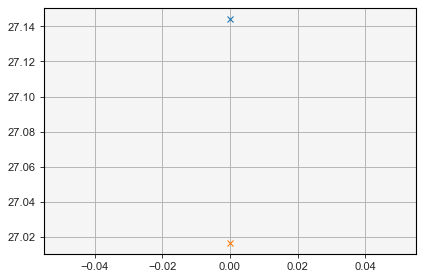

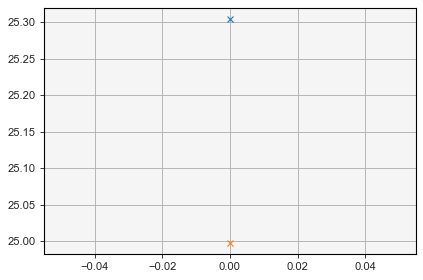

In [25]:
import matplotlib.pyplot as mp
mp.figure()
mp.plot(corrected['corrected_cph_sph'], 'x')
mp.plot(corrected['corrected_cph_spl'], 'x')
mp.figure()
mp.plot(corrected['corrected_cpl_sph'], 'x')
mp.plot(corrected['corrected_cpl_spl'], 'x')

In [ ]:
# OD from pulse areas
od = {'od_cph_sph': OD_calc(norm_cph_cp, corrected['corrected_cph_sph']),
      'od_cph_spl': OD_calc(norm_cph_cp, corrected['corrected_cph_spl']),
      'od_cpl_sph': OD_calc(norm_cpl_cp, corrected['corrected_cpl_sph']),
      'od_cpl_spl': OD_calc(norm_cpl_cp, corrected['corrected_cpl_spl'])}

dat.write_json(folder + '_od_995.json', od)

In [ ]:
import matplotlib.pyplot as mp
mp.figure()
mp.plot(od['od_cph_sph'], 'x')
mp.plot(od['od_cph_spl'], 'x')
mp.figure()
mp.plot(od['od_cpl_sph'], 'x')
mp.plot(od['od_cpl_spl'], 'x')